(828, 576)


/Users/killaars/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


(1020, 2280)


/Users/killaars/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in log


(1020, 2280)


/Users/killaars/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:67: RuntimeWarning: divide by zero encountered in log


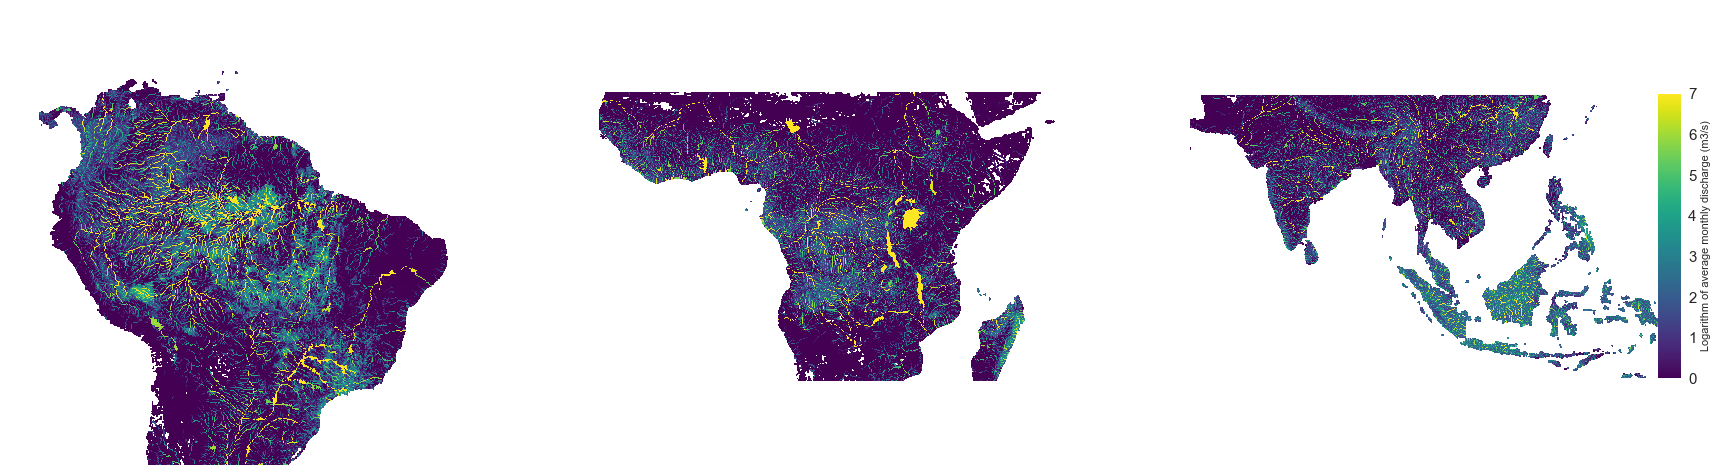

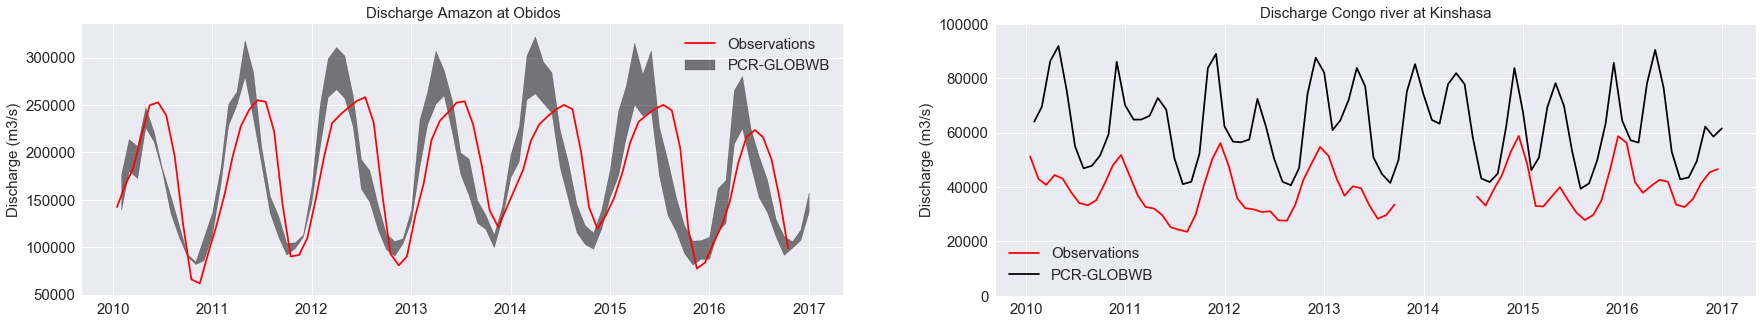

In [223]:
import numpy as np
import os,sys
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set clim once for all 3 plots. 
clim=0, 7

# Amazon
path='/Users/killaars/PhD/Elnino/Discharge/'
anomaly_fh = nc.Dataset(os.path.join(path,'MSWEP_newspinup_discharge_dailyTot_output.nc'),mode='r')

data=anomaly_fh.variables['discharge'][0,:,:]
lat = anomaly_fh.variables['latitude'][:]
lon = anomaly_fh.variables['longitude'][:]
lon, lat = np.meshgrid(lon, lat)
print(np.shape(data))

fig = plt.figure(figsize=(30,15))
#fig.suptitle('Soil moisture storage anomaly (m) for the ENSO event of 2015/2016',fontsize='20', y=0.65) #y to fix the y-position, otherwise title would float.
ax1 = fig.add_subplot(131)
#ax1.set_title("Average monthly discharge Amazon",fontsize='15')
m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
            llcrnrlat=-30,urcrnrlat=20,\
            llcrnrlon=-90,urcrnrlon=-30,\
            rsphere=6371200.,resolution='i',area_thresh=10000)
m.drawmapboundary(color='white',fill_color='white')
#m.drawcoastlines(color='lightgray')
m.pcolormesh(lon, lat, np.log(data[:,:]),
             latlon=True, cmap='viridis')
plt.clim(clim)

# Africa
path='/Users/killaars/PhD/Elnino/Discharge/'
anomaly_fh = nc.Dataset(os.path.join(path,'discharge_monthmean.nc'),mode='r')

data=anomaly_fh.variables['discharge'][0,:,:]
lat = anomaly_fh.variables['latitude'][:]
lon = anomaly_fh.variables['longitude'][:]
lon, lat = np.meshgrid(lon, lat)
print(np.shape(data))

ax1 = fig.add_subplot(132)
#ax1.set_title("Average monthly discharge Africa",fontsize='15')
m = Basemap(projection='stere',lon_0=12,lat_0=0,lat_ts=12,\
            llcrnrlat=-25,urcrnrlat=16,\
            llcrnrlon=-18,urcrnrlon=60,\
            rsphere=6371200.,resolution='i',area_thresh=10000)
m.drawmapboundary(color='white',fill_color='white')
#m.drawcoastlines(color='lightgray')
m.pcolormesh(lon, lat, np.log(data[:,:]),
             latlon=True, cmap='viridis')
plt.clim(clim)

# ZO Azie
path='/Users/killaars/PhD/Elnino/Discharge/'
anomaly_fh = nc.Dataset(os.path.join(path,'discharge_monthmean.nc'),mode='r')

data=anomaly_fh.variables['discharge'][0,:,:]
lat = anomaly_fh.variables['latitude'][:]
lon = anomaly_fh.variables['longitude'][:]
lon, lat = np.meshgrid(lon, lat)
print(np.shape(data))

ax1 = fig.add_subplot(133)
#ax1.set_title("Average monthly discharge Amazon",fontsize='15')
m = Basemap(projection='stere',lon_0=94,lat_0=8,lat_ts=8,\
            llcrnrlat=-12,urcrnrlat=28,\
            llcrnrlon=62,urcrnrlon=140,\
            rsphere=6371200.,resolution='i',area_thresh=10000)
m.drawmapboundary(color='white',fill_color='white')
#m.drawcoastlines(color='lightgray')
m.pcolormesh(lon, lat, np.log(data[:,:]),
             latlon=True, cmap='viridis')
plt.clim(clim)

# Make colorbar same size as figures
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0)
cb=plt.colorbar(cax=cax,label='Logarithm of average monthly discharge (m3/s)')

plt.tick_params(labelsize=15) 
plt.show()

# 2nd part figure 1
import pandas as pd

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx],idx

# Locations Obidos and Congo
Obidos_lat=-1.94722
Obidos_lon=-55.51111
Congo_lat=-4.28
Congo_lon=15.3

# Read data from file
obidos = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/discharge_files_HYBAM/obidos_monthly.txt',sep=';')
congo = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/discharge_files_HYBAM/discharge_congo_hybam.txt',sep=';')
# Create index based on date column
obidos["new_date"]=pd.to_datetime(obidos["date"],format='%d/%m/%Y')
obidos=obidos.set_index('new_date')
congo["new_date"]=pd.to_datetime(congo["date"],format='%d/%m/%Y')
congo=congo.set_index('new_date')
# Merge two datasets according to the index and drop the column 'date' from both. (axis=1 indicates that it is a column and not a row)
obsdata=pd.concat([obidos.drop(['date'],axis=1),congo.drop(['date'],axis=1)],axis=1)
#print(obsdata)

# Read PCR lat/lon from MSWEP file
MSWEP_AMA=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/MSWEP_full_discharge_monthAvg_output.nc',mode='r')
MSWEP_oth=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/discharge_monthAvg_output_othertropics_2000_2016.nc',mode='r')

lat_AMA = MSWEP_AMA.variables['latitude'][:]
lon_AMA = MSWEP_AMA.variables['longitude'][:]
lat_Oth = MSWEP_oth.variables['latitude'][:]
lon_Oth = MSWEP_oth.variables['longitude'][:]

# Match latitude to closest point in the PCR-GLOBWB output
lat_station_Obi,idy_Obi = find_nearest(lat_AMA,Obidos_lat)
lat_station_Afr,idy_Afr = find_nearest(lat_Oth,Congo_lat)

# Match longitude to closest point in the PCR-GLOBWB output
lon_station_Obi,idx_Obi = find_nearest(lon_AMA,Obidos_lon)
lon_station_Afr,idx_Afr = find_nearest(lon_Oth,Congo_lon)

# Read corresponding PCR data
TRMM_AMA=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/discharge_monthAvg_output_TRMM_2007_2016.nc',mode='r')
ERA5_AMA=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/discharge_monthAvg_output_ERA5_2010_2016.nc',mode='r')

MSWEP_obi=MSWEP_AMA.variables['discharge'][:,idy_Obi,idx_Obi]
TRMM_obi=TRMM_AMA.variables['discharge'][:,idy_Obi,idx_Obi]
ERA5_obi=ERA5_AMA.variables['discharge'][:,idy_Obi,idx_Obi]
MSWEP_congo=MSWEP_oth.variables['discharge'][:,idy_Afr,idx_Afr]

# Create timeseries from 2000-01-01 to 2016-12-31
timesMSWEP=pd.date_range('2000-01-01','2016-12-31',freq='M')
timesTRMM=pd.date_range('2007-01-01','2016-12-31',freq='M')
timesERA5=pd.date_range('2010-01-01','2016-12-31',freq='M')

# Create min/max from the different PCR precip results

# Load data in dataframe
MSWEP_series=pd.Series(MSWEP_obi,index=timesMSWEP,name='MSWEP')
TRMM_series=pd.Series(TRMM_obi,index=timesTRMM,name='TRMM')
ERA5_series=pd.Series(ERA5_obi,index=timesERA5,name='ERA5')

MSWEP_congo_series=pd.Series(MSWEP_congo,index=timesMSWEP,name='MSWEP Congo')

Plot_df=pd.concat([MSWEP_series,TRMM_series,ERA5_series],axis=1)
Plot_df['min']=Plot_df.loc[:,['MSWEP','TRMM','ERA5']].min(axis=1)
Plot_df['max']=Plot_df.loc[:,['MSWEP','TRMM','ERA5']].max(axis=1)
Plot_df['MSWEP Congo']=MSWEP_congo_series

# Only keep data from 2010 onwards
Plot_df=Plot_df['2010':'2016']
obsdata=obsdata['2010':'2016']

# Plot data, left Obidos, right Congo
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(121)
ax1.set_title("Discharge Amazon at Obidos",fontsize='15')
ax1.plot(obsdata.index, obsdata['discharge amazon'], 'r',label='Observations')
ax1.fill_between(Plot_df.index, Plot_df['min'], 
                 Plot_df['max'], color='k', alpha=0.5,label='PCR-GLOBWB')
plt.ylabel('Discharge (m3/s)',fontsize=15)
plt.tick_params(labelsize=15) 
# plt.axvspan(datetime.strptime("15-06-2015", '%d-%m-%Y'), 
#             datetime.strptime("15-09-2015", '%d-%m-%Y'), 
#             color='grey',alpha=0.2)
lgd=plt.legend(loc='upper right',fontsize=15)

ax2 = fig.add_subplot(122)
ax2.set_title("Discharge Congo river at Kinshasa",fontsize='15')
ax2.plot(obsdata.index, obsdata['discharge congo'], 'r',label='Observations')
ax2.plot(Plot_df.index, Plot_df['MSWEP Congo'], 'k',label='PCR-GLOBWB')
# ax2.fill_between(plot_df.index, plot_df['Climatology Africa']-plot_df['Climatology Africa STD'], 
#                  plot_df['Climatology Africa']+plot_df['Climatology Africa STD'], color='k', alpha=0.2)
plt.tick_params(labelsize=15) 
plt.ylabel('Discharge (m3/s)',fontsize=15)
#plt.xlabel('Time',fontsize=15)
plt.ylim(0,100000)
lgd=plt.legend(fontsize=15)

#lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.tick_params(labelsize=15) 
plt.show()

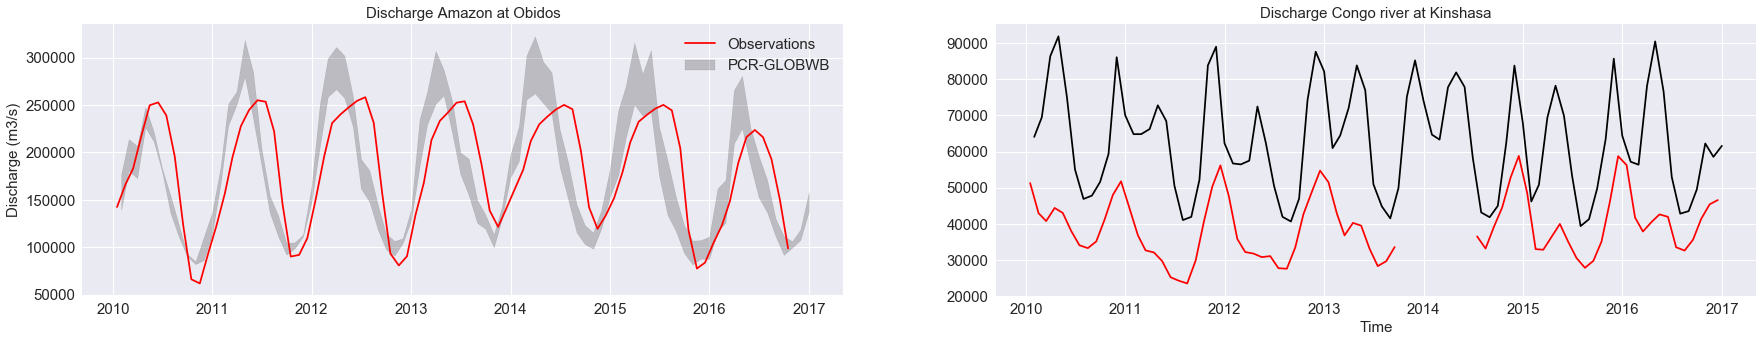

In [203]:
# 2nd part figure 1
import pandas as pd

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx],idx

# Locations Obidos and Congo
Obidos_lat=-1.94722
Obidos_lon=-55.51111
Congo_lat=-4.28
Congo_lon=15.3

# Read data from file
obidos = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/discharge_files_HYBAM/obidos_monthly.txt',sep=';')
congo = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/discharge_files_HYBAM/discharge_congo_hybam.txt',sep=';')
# Create index based on date column
obidos["new_date"]=pd.to_datetime(obidos["date"],format='%d/%m/%Y')
obidos=obidos.set_index('new_date')
congo["new_date"]=pd.to_datetime(congo["date"],format='%d/%m/%Y')
congo=congo.set_index('new_date')
# Merge two datasets according to the index and drop the column 'date' from both. (axis=1 indicates that it is a column and not a row)
obsdata=pd.concat([obidos.drop(['date'],axis=1),congo.drop(['date'],axis=1)],axis=1)
#print(obsdata)

# Read PCR lat/lon from MSWEP file
MSWEP_AMA=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/MSWEP_full_discharge_monthAvg_output.nc',mode='r')
MSWEP_oth=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/discharge_monthAvg_output_othertropics_2000_2016.nc',mode='r')

lat_AMA = MSWEP_AMA.variables['latitude'][:]
lon_AMA = MSWEP_AMA.variables['longitude'][:]
lat_Oth = MSWEP_oth.variables['latitude'][:]
lon_Oth = MSWEP_oth.variables['longitude'][:]

# Match latitude to closest point in the PCR-GLOBWB output
lat_station_Obi,idy_Obi = find_nearest(lat_AMA,Obidos_lat)
lat_station_Afr,idy_Afr = find_nearest(lat_Oth,Congo_lat)

# Match longitude to closest point in the PCR-GLOBWB output
lon_station_Obi,idx_Obi = find_nearest(lon_AMA,Obidos_lon)
lon_station_Afr,idx_Afr = find_nearest(lon_Oth,Congo_lon)

# Read corresponding PCR data
TRMM_AMA=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/discharge_monthAvg_output_TRMM_2007_2016.nc',mode='r')
ERA5_AMA=nc.Dataset('/Users/killaars/PhD/Elnino/Discharge/discharge_monthAvg_output_ERA5_2010_2016.nc',mode='r')

MSWEP_obi=MSWEP_AMA.variables['discharge'][:,idy_Obi,idx_Obi]
TRMM_obi=TRMM_AMA.variables['discharge'][:,idy_Obi,idx_Obi]
ERA5_obi=ERA5_AMA.variables['discharge'][:,idy_Obi,idx_Obi]
MSWEP_congo=MSWEP_oth.variables['discharge'][:,idy_Afr,idx_Afr]

# Create timeseries from 2000-01-01 to 2016-12-31
timesMSWEP=pd.date_range('2000-01-01','2016-12-31',freq='M')
timesTRMM=pd.date_range('2007-01-01','2016-12-31',freq='M')
timesERA5=pd.date_range('2010-01-01','2016-12-31',freq='M')

# Create min/max from the different PCR precip results

# Load data in dataframe
MSWEP_series=pd.Series(MSWEP_obi,index=timesMSWEP,name='MSWEP')
TRMM_series=pd.Series(TRMM_obi,index=timesTRMM,name='TRMM')
ERA5_series=pd.Series(ERA5_obi,index=timesERA5,name='ERA5')

MSWEP_congo_series=pd.Series(MSWEP_congo,index=timesMSWEP,name='MSWEP Congo')

Plot_df=pd.concat([MSWEP_series,TRMM_series,ERA5_series],axis=1)
Plot_df['min']=Plot_df.loc[:,['MSWEP','TRMM','ERA5']].min(axis=1)
Plot_df['max']=Plot_df.loc[:,['MSWEP','TRMM','ERA5']].max(axis=1)
Plot_df['MSWEP Congo']=MSWEP_congo_series

# Only keep data from 2010 onwards
Plot_df=Plot_df['2010':'2016']
obsdata=obsdata['2010':'2016']

# Plot data, left Obidos, right Congo
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(121)
ax1.set_title("Discharge Amazon at Obidos",fontsize='15')
ax1.plot(obsdata.index, obsdata['discharge amazon'], 'r',label='Observations')
ax1.fill_between(Plot_df.index, Plot_df['min'], 
                 Plot_df['max'], color='k', alpha=0.2,label='PCR-GLOBWB')
plt.ylabel('Discharge (m3/s)',fontsize=15)
plt.tick_params(labelsize=15) 
# plt.axvspan(datetime.strptime("15-06-2015", '%d-%m-%Y'), 
#             datetime.strptime("15-09-2015", '%d-%m-%Y'), 
#             color='grey',alpha=0.2)
lgd=plt.legend(loc='upper right',fontsize=15)

ax2 = fig.add_subplot(122)
ax2.set_title("Discharge Congo river at Kinshasa",fontsize='15')
ax2.plot(obsdata.index, obsdata['discharge congo'], 'r',label='Observations')
ax2.plot(Plot_df.index, Plot_df['MSWEP Congo'], 'k',label='PCR-GLOBWB')
# ax2.fill_between(plot_df.index, plot_df['Climatology Africa']-plot_df['Climatology Africa STD'], 
#                  plot_df['Climatology Africa']+plot_df['Climatology Africa STD'], color='k', alpha=0.2)
plt.tick_params(labelsize=15) 
plt.xlabel('Time',fontsize=15)


#lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.tick_params(labelsize=15) 
plt.show()



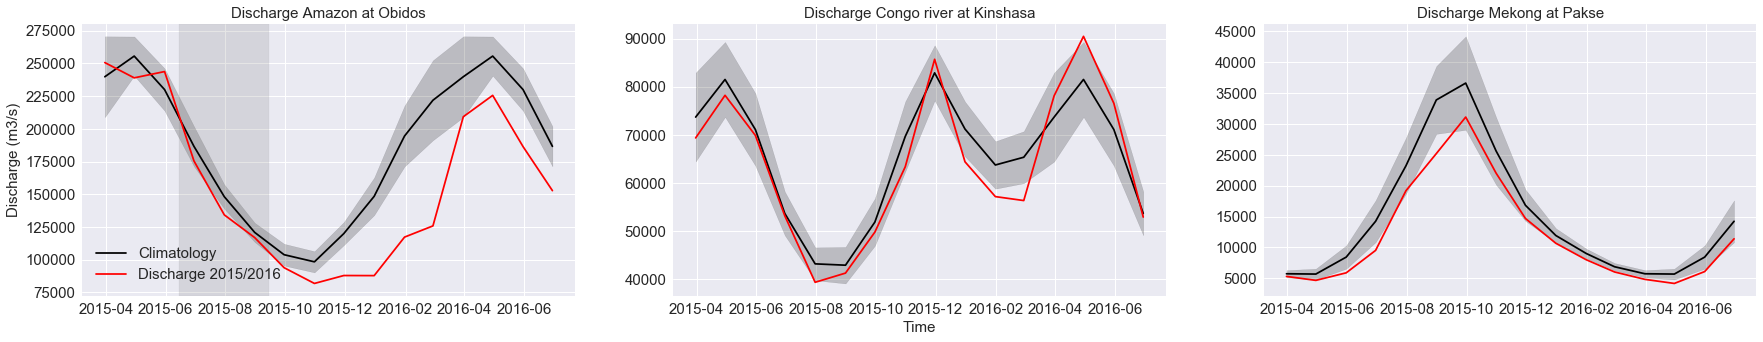

In [224]:
# Figure 2 
import pandas as pd
from datetime import datetime

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx],idx

# Location Obidos
Obidos_lat=-1.94722
Obidos_lon=-55.51111
Afr_lat=-4.28
Afr_lon=15.3
Azie_lat=13.51
Azie_lon=105.92

path='/Users/killaars/PhD/Elnino/Discharge/'
MSWEP_ama_fh=nc.Dataset(os.path.join(path,'MSWEP_full_discharge_monthAvg_output.nc'),mode='r')
MSWEP_othertropics_fh=nc.Dataset(os.path.join(path,'discharge_monthAvg_output_othertropics_2000_2016.nc'),mode='r')

# First find PCR_location, so the whole dataset does not have to be loaded
lat_AMA = MSWEP_ama_fh.variables['latitude'][:]
lon_AMA = MSWEP_ama_fh.variables['longitude'][:]
lat_Oth = MSWEP_othertropics_fh.variables['latitude'][:]
lon_Oth = MSWEP_othertropics_fh.variables['longitude'][:]

# Match latitude to closest point in the PCR-GLOBWB output
lat_station_Obi,idy_Obi = find_nearest(lat_AMA,Obidos_lat)
lat_station_Afr,idy_Afr = find_nearest(lat_Oth,Afr_lat)
lat_station_Azie,idy_Azie = find_nearest(lat_Oth,Azie_lat)

# Match longitude to closest point in the PCR-GLOBWB output
lon_station_Obi,idx_Obi = find_nearest(lon_AMA,Obidos_lon)
lon_station_Afr,idx_Afr = find_nearest(lon_Oth,Afr_lon)
lon_station_Azie,idx_Azie = find_nearest(lon_Oth,Azie_lon)

# Load data from that point
data_Obi=MSWEP_ama_fh.variables['discharge'][:,idy_Obi,idx_Obi]
data_Afr=MSWEP_othertropics_fh.variables['discharge'][:,idy_Afr,idx_Afr]
data_Azie=MSWEP_othertropics_fh.variables['discharge'][:,idy_Azie,idx_Azie]

# Create timeseries to be used later
times=pd.date_range('1/1/2000', '31/12/2016', freq='M')
times_ENSO=pd.date_range('1/1/2015', '31/12/2016', freq='M')

# Put data in dataframe - so you can groupby month
obidos_df=pd.DataFrame({'discharge': data_Obi},index=times)
africa_df=pd.DataFrame({'discharge': data_Afr},index=times)
azie_df=pd.DataFrame({'discharge': data_Azie},index=times)

# Groupby month for the period 2000-2014 (includes 2014)
climatology_obi=obidos_df['2000':'2014'].groupby(obidos_df['2000':'2014'].index.month).mean()
climatology_obi_std=obidos_df['2000':'2014'].groupby(obidos_df['2000':'2014'].index.month).std()

climatology_afr=africa_df['2000':'2014'].groupby(africa_df['2000':'2014'].index.month).mean()
climatology_afr_std=africa_df['2000':'2014'].groupby(africa_df['2000':'2014'].index.month).std()

climatology_azie=azie_df['2000':'2014'].groupby(azie_df['2000':'2014'].index.month).mean()
climatology_azie_std=azie_df['2000':'2014'].groupby(azie_df['2000':'2014'].index.month).std()

# Put the climatology twice in an array, because plot is 2 years long
climatology_obi = np.append(climatology_obi.values,climatology_obi.values)
climatology_obi_std = np.append(climatology_obi_std.values,climatology_obi_std.values)

climatology_afr = np.append(climatology_afr.values,climatology_afr.values)
climatology_afr_std = np.append(climatology_afr_std.values,climatology_afr_std.values)

climatology_azie = np.append(climatology_azie.values,climatology_azie.values)
climatology_azie_std = np.append(climatology_azie_std.values,climatology_azie_std.values)

# Put 2016 after 2015 in one array
ENSO_obi=np.append(obidos_df['2015'].values,obidos_df['2016'].values)
ENSO_afr=np.append(africa_df['2015'].values,africa_df['2016'].values)
ENSO_azie=np.append(azie_df['2015'].values,azie_df['2016'].values)

# Put values in dataframe that will be plotted
plot_df=pd.DataFrame({'ENSO Obidos': ENSO_obi,
                      'Climatology Obidos': climatology_obi,
                      'Climatology Obidos STD': climatology_obi_std,
                      'ENSO Africa': ENSO_afr,
                      'Climatology Africa': climatology_afr,
                      'Climatology Africa STD': climatology_afr_std,
                      'ENSO Asia': ENSO_azie,
                      'Climatology Asia': climatology_azie,
                      'Climatology Asia STD': climatology_azie_std}, index=times_ENSO)

# Cut off dataframe from 03-3015 to 06-2016
plot_df=plot_df['2015-3':'2016-6']

# Plot dataframe
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(131)
ax1.set_title("Discharge Amazon at Obidos",fontsize='15')
ax1.plot(plot_df.index, plot_df['Climatology Obidos'], 'k',label='Climatology')
ax1.plot(plot_df.index, plot_df['ENSO Obidos'], 'r',label='Discharge 2015/2016')
ax1.fill_between(plot_df.index, plot_df['Climatology Obidos']-plot_df['Climatology Obidos STD'], 
                 plot_df['Climatology Obidos']+plot_df['Climatology Obidos STD'], color='k', alpha=0.2)
plt.ylabel('Discharge (m3/s)',fontsize=15)
plt.tick_params(labelsize=15) 
plt.axvspan(datetime.strptime("15-06-2015", '%d-%m-%Y'), 
            datetime.strptime("15-09-2015", '%d-%m-%Y'), 
            color='grey',alpha=0.2)
lgd=plt.legend(loc='lower left',fontsize=15)

ax2 = fig.add_subplot(132)
ax2.set_title("Discharge Congo river at Kinshasa",fontsize='15')
ax2.plot(plot_df.index, plot_df['Climatology Africa'], 'k',label='Climatology')
ax2.plot(plot_df.index, plot_df['ENSO Africa'], 'r',label='Discharge 2015/2016')
ax2.fill_between(plot_df.index, plot_df['Climatology Africa']-plot_df['Climatology Africa STD'], 
                 plot_df['Climatology Africa']+plot_df['Climatology Africa STD'], color='k', alpha=0.2)
plt.tick_params(labelsize=15) 
plt.xlabel('Time',fontsize=15)

ax3 = fig.add_subplot(133)
ax3.set_title("Discharge Mekong at Stung Treng",fontsize='15')
ax3.plot(plot_df.index, plot_df['Climatology Asia'], 'k',label='Climatology')
ax3.plot(plot_df.index, plot_df['ENSO Asia'], 'r',label='Discharge 2015/2016')
ax3.fill_between(plot_df.index, plot_df['Climatology Asia']-plot_df['Climatology Asia STD'], 
                 plot_df['Climatology Asia']+plot_df['Climatology Asia STD'], color='k', alpha=0.2)


#lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.tick_params(labelsize=15) 
plt.show()

            AMA Basin      reg1      reg2      reg3
2016-01-01   0.223704  0.211849  0.222328  0.234171
2016-01-02   0.224130  0.212074  0.222968  0.234552
2016-01-03   0.225142  0.213041  0.224938  0.234998
2016-01-04   0.226194  0.214177  0.227053  0.234965
2016-01-05   0.226462  0.213460  0.226532  0.236629
2016-01-06   0.227833  0.213510  0.228608  0.238351
2016-01-07   0.228212  0.213575  0.228311  0.239251
2016-01-08   0.228882  0.211922  0.229203  0.241433
2016-01-09   0.229561  0.210197  0.230286  0.243625
2016-01-10   0.229894  0.208579  0.230110  0.245742
2016-01-11   0.231369  0.207655  0.232248  0.248232
2016-01-12   0.232447  0.207979  0.233468  0.249803
2016-01-13   0.233301  0.209075  0.234313  0.250845
2016-01-14   0.234018  0.207893  0.236048  0.252382
2016-01-15   0.234984  0.209656  0.236579  0.253295
2016-01-16   0.235737  0.212005  0.237488  0.253086
2016-01-17   0.236327  0.212828  0.239272  0.252638
2016-01-18   0.237126  0.215413  0.239892  0.252619
2016-01-19  

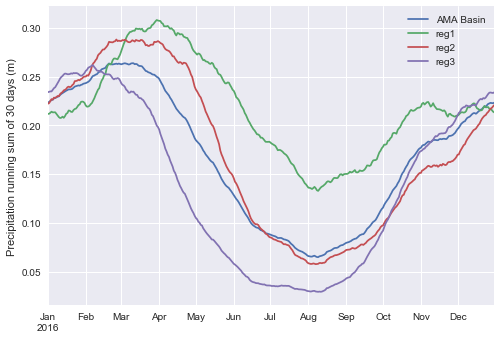

In [128]:
# Precip

AMA_fh=nc.Dataset('/Users/killaars/PhD/Elnino/precip/runmean30_AMAbasin.nc',mode='r')
AMA=AMA_fh.variables['precipitation'][:,0,0]
reg1_fh=nc.Dataset('/Users/killaars/PhD/Elnino/precip/runmean30_reg1.nc',mode='r')
reg1=reg1_fh.variables['precipitation'][:,0,0]
reg2_fh=nc.Dataset('/Users/killaars/PhD/Elnino/precip/runmean30_reg2.nc',mode='r')
reg2=reg2_fh.variables['precipitation'][:,0,0]
reg3_fh=nc.Dataset('/Users/killaars/PhD/Elnino/precip/runmean30_reg3.nc',mode='r')
reg3=reg3_fh.variables['precipitation'][:,0,0]

times=pd.date_range('01/01/2016','31/12/2016',freq='D')

df=pd.DataFrame({'AMA Basin': AMA,
                 'reg1': reg1,
                 'reg2': reg2,
                 'reg3': reg3},index=times)
print(df)
df.plot()
plt.ylabel('Precipitation running sum of 30 days (m)')
plt.show()